<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [137]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape                                                                       DONE
- Data types                                                                       DONE
- Count of null values by column                                                   DONE
- Basic summary statistics                                                         DONE
- Number of unique values for each column                                          DONE
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)  DONE
- Scatterplot of each column with median price                                     DONE

In [3]:
boston.data.shape

(506, 13)

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

No null values

In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
X.loc[:,'CRIM'].value_counts()

14.33370    2
0.01501     2
0.08265     1
0.97617     1
0.14103     1
0.03502     1
0.03615     1
0.66351     1
0.12650     1
0.10469     1
0.25356     1
0.10000     1
0.05515     1
0.11027     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
0.02009     1
0.14866     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
2.44953     1
           ..
9.18702     1
0.05602     1
1.83377     1
15.86030    1
7.67202     1
51.13580    1
15.17720    1
8.05579     1
10.06230    1
41.52920    1
0.32264     1
0.04379     1
0.22212     1
0.13117     1
0.51183     1
6.28807     1
0.08826     1
24.80170    1
0.09065     1
23.64820    1
3.56868     1
12.80230    1
0.72580     1
0.03113     1
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.26838     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

In [9]:
X.loc[:,'ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [10]:
X.loc[:,'INDUS'].value_counts()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
9.90      12
3.97      12
8.56      11
10.59     11
5.86      10
10.01      9
6.91       9
7.38       8
2.46       8
5.19       8
9.69       8
7.87       7
25.65      7
2.18       7
4.05       7
5.13       6
3.44       6
12.83      6
4.93       6
13.92      5
6.96       5
27.74      5
11.93      5
2.89       5
6.41       5
        ... 
2.03       2
7.07       2
1.91       2
2.93       2
6.06       2
1.47       2
3.37       2
1.69       2
2.95       2
1.25       2
3.64       2
3.78       2
2.68       2
4.39       2
1.38       1
2.97       1
2.25       1
3.75       1
1.89       1
1.22       1
1.32       1
0.74       1
1.76       1
2.31       1
0.46       1
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

In [11]:
X.loc[:,'CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [12]:
X.loc[:,'NOX'].value_counts()

0.5380    23
0.7130    18
0.4370    17
0.8710    16
0.4890    15
0.6240    15
0.6930    14
0.6050    14
0.7400    13
0.5440    12
0.7000    11
0.5200    11
0.6470    10
0.5070    10
0.4310    10
0.4480     9
0.5470     9
0.4880     8
0.4640     8
0.4930     8
0.7700     8
0.4280     8
0.5040     8
0.5850     8
0.5840     8
0.5150     8
0.6790     8
0.5240     7
0.5810     7
0.6140     7
          ..
0.4429     4
0.4000     4
0.4050     3
0.4100     3
0.6550     3
0.4090     3
0.4290     3
0.4580     3
0.4330     3
0.4040     3
0.6680     3
0.4161     3
0.4010     3
0.4030     3
0.4600     3
0.4420     3
0.5750     2
0.3980     2
0.4690     2
0.4840     2
0.3920     2
0.4150     2
0.6590     2
0.4379     2
0.4350     1
0.3850     1
0.3940     1
0.5180     1
0.4220     1
0.3890     1
Name: NOX, Length: 81, dtype: int64

In [13]:
X.loc[:,'RM'].value_counts()

6.167    3
6.229    3
6.127    3
5.713    3
6.417    3
6.405    3
6.380    2
5.304    2
5.983    2
7.185    2
5.856    2
6.968    2
7.820    2
5.936    2
6.030    2
6.251    2
6.431    2
6.727    2
6.004    2
6.185    2
6.193    2
6.495    2
5.757    2
6.782    2
6.951    2
5.404    2
6.009    2
6.794    2
6.315    2
5.935    2
        ..
6.112    1
6.006    1
7.147    1
5.468    1
5.707    1
7.267    1
6.800    1
5.818    1
6.430    1
6.762    1
6.593    1
7.178    1
5.570    1
5.884    1
6.471    1
7.107    1
6.382    1
6.575    1
7.287    1
5.898    1
5.403    1
8.266    1
6.101    1
5.093    1
5.036    1
6.552    1
4.368    1
6.174    1
6.701    1
6.625    1
Name: RM, Length: 446, dtype: int64

In [14]:
X.loc[:,'AGE'].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
87.9      4
98.8      4
94.1      3
88.0      3
21.4      3
96.2      3
98.9      3
97.3      3
32.2      3
97.0      3
92.6      3
36.6      3
97.4      3
95.6      3
76.5      3
94.5      2
91.9      2
6.6       2
77.7      2
18.5      2
21.9      2
84.1      2
94.6      2
82.6      2
93.6      2
         ..
77.8      1
78.9      1
38.1      1
66.6      1
37.2      1
89.9      1
74.8      1
61.8      1
45.6      1
78.3      1
96.8      1
95.7      1
62.2      1
73.9      1
44.4      1
97.8      1
24.8      1
68.2      1
35.9      1
64.7      1
18.8      1
46.7      1
27.6      1
97.7      1
81.3      1
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [15]:
X.loc[:,'DIS'].value_counts()

3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
3.6519    3
7.3172    3
5.4917    3
7.8278    3
5.4159    3
6.4980    3
7.3090    3
4.8122    3
6.0622    3
6.4798    3
5.1167    3
6.3361    3
3.9454    3
4.7211    3
3.3751    2
2.4259    2
3.7965    2
3.2721    2
7.9549    2
7.3073    2
2.7147    2
4.3549    2
5.1180    2
4.1480    2
5.9604    2
         ..
1.9265    1
3.4106    1
2.7831    1
3.8771    1
2.2565    1
1.4655    1
3.7886    1
3.0993    1
3.9986    1
2.4631    1
2.2616    1
7.2255    1
3.1025    1
2.8290    1
2.4210    1
2.1974    1
4.4619    1
2.4329    1
1.3216    1
1.8773    1
3.3779    1
3.5459    1
1.7984    1
2.5480    1
1.7659    1
3.5549    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64

In [16]:
X.loc[:,'RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [17]:
X.loc[:,'TAX'].value_counts()

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
264.0     12
398.0     12
277.0     11
384.0     11
330.0     10
224.0     10
432.0      9
233.0      9
276.0      9
391.0      8
193.0      8
296.0      8
287.0      8
188.0      7
270.0      7
300.0      7
311.0      7
284.0      7
222.0      7
329.0      6
216.0      5
223.0      5
254.0      5
273.0      5
711.0      5
        ... 
345.0      3
293.0      3
430.0      3
245.0      3
358.0      3
242.0      2
411.0      2
348.0      2
402.0      2
252.0      2
337.0      2
335.0      2
265.0      2
315.0      2
370.0      2
334.0      2
352.0      2
351.0      1
226.0      1
256.0      1
244.0      1
241.0      1
198.0      1
285.0      1
422.0      1
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 66, dtype: int64

In [18]:
X.loc[:,'PTRATIO'].value_counts()

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
20.9     11
17.9     11
18.7      9
19.7      8
19.6      8
17.6      7
16.4      6
18.0      5
16.0      5
20.1      5
16.1      5
16.9      5
16.8      4
14.9      4
19.0      4
18.5      4
17.0      4
18.2      4
18.3      4
12.6      3
14.8      3
18.9      3
15.3      3
15.9      2
22.0      2
15.6      2
18.8      2
15.5      1
17.3      1
15.1      1
21.1      1
13.6      1
14.4      1
Name: PTRATIO, dtype: int64

In [19]:
X.loc[:,'B'].value_counts()

396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
396.21      2
395.69      2
396.06      2
395.63      2
395.60      2
392.78      2
391.34      2
395.58      2
377.07      2
394.12      2
395.11      2
376.14      2
395.56      2
389.71      2
390.94      2
341.60      2
388.45      2
393.37      2
393.68      2
392.80      2
393.45      2
395.62      2
374.71      2
392.20      1
394.62      1
         ... 
392.85      1
384.54      1
384.07      1
376.94      1
394.95      1
24.65       1
334.40      1
285.83      1
387.89      1
379.38      1
386.40      1
379.41      1
379.70      1
390.07      1
382.84      1
393.25      1
354.70      1
395.93      1
362.25      1
318.75      1
395.01      1
43.06       1
391.98      1
354.31      1
388.08      1
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: B, Length: 357, dtype: int64

In [20]:
X.loc[:,'LSTAT'].value_counts()

14.10    3
6.36     3
18.13    3
8.05     3
7.79     3
9.50     2
4.59     2
3.76     2
17.27    2
10.11    2
4.56     2
3.16     2
15.17    2
23.98    2
10.45    2
14.81    2
5.68     2
6.72     2
12.43    2
7.44     2
15.02    2
13.15    2
8.10     2
30.81    2
18.06    2
7.60     2
12.03    2
17.60    2
3.53     2
3.11     2
        ..
17.58    1
26.45    1
7.74     1
6.92     1
9.28     1
20.34    1
16.47    1
3.26     1
5.91     1
4.03     1
10.29    1
7.14     1
6.90     1
3.73     1
13.33    1
29.53    1
14.15    1
12.64    1
6.57     1
14.64    1
13.22    1
10.63    1
27.80    1
13.09    1
6.43     1
9.69     1
9.62     1
5.64     1
22.98    1
29.05    1
Name: LSTAT, Length: 455, dtype: int64

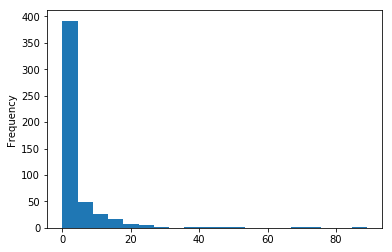

In [21]:
ax = X.loc[:, 'CRIM'].plot(kind='hist', bins=20)

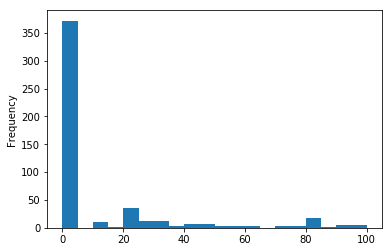

In [22]:
ax = X.loc[:, 'ZN'].plot(kind='hist', bins=20)

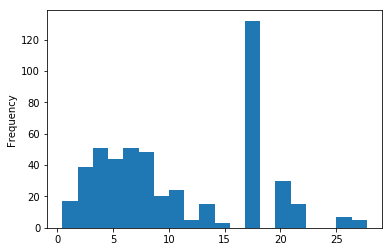

In [23]:
ax = X.loc[:, 'INDUS'].plot(kind='hist', bins=20)

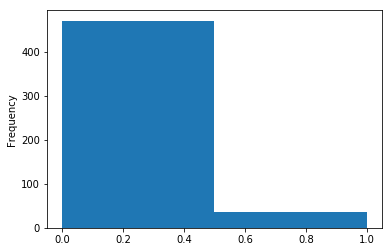

In [24]:
ax = X.loc[:, 'CHAS'].plot(kind='hist', bins=2)

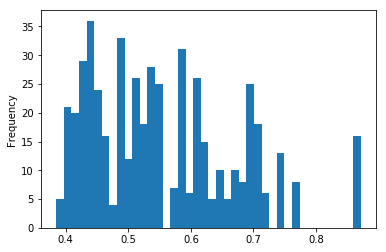

In [25]:
ax = X.loc[:, 'NOX'].plot(kind='hist', bins=40)

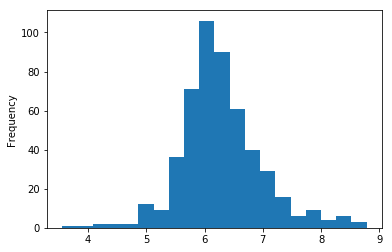

In [26]:
ax = X.loc[:, 'RM'].plot(kind='hist', bins=20)

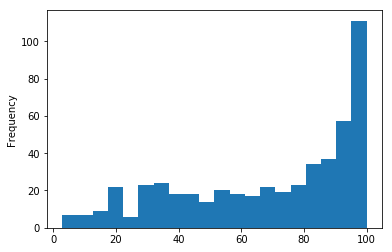

In [27]:
ax = X.loc[:, 'AGE'].plot(kind='hist', bins=20)

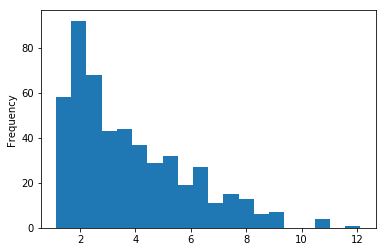

In [28]:
ax = X.loc[:, 'DIS'].plot(kind='hist', bins=20)

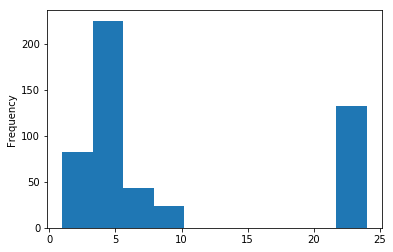

In [29]:
ax = X.loc[:, 'RAD'].plot(kind='hist', bins=10)

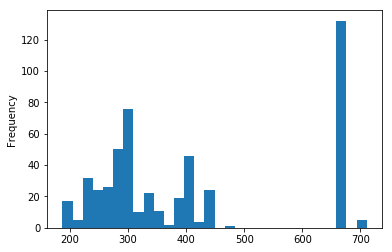

In [30]:
ax = X.loc[:, 'TAX'].plot(kind='hist', bins=30)

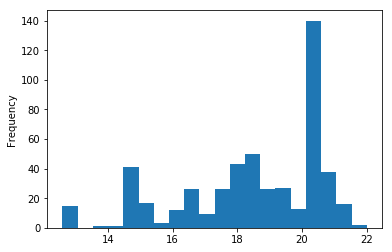

In [31]:
ax = X.loc[:, 'PTRATIO'].plot(kind='hist', bins=20)

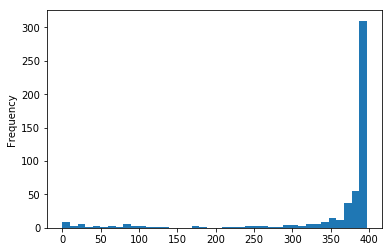

In [32]:
ax = X.loc[:, 'B'].plot(kind='hist', bins=40)

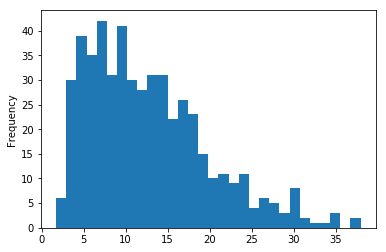

In [33]:
ax = X.loc[:, 'LSTAT'].plot(kind='hist', bins=30)

In [34]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [111]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [112]:
bostondata = X

In [113]:
bostondata['MEDV'] = y.values

In [114]:
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [39]:
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


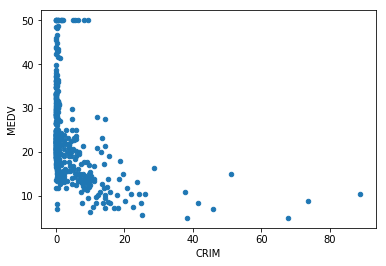

In [40]:
ax = bostondata.plot(x='CRIM',y='MEDV', kind='scatter')

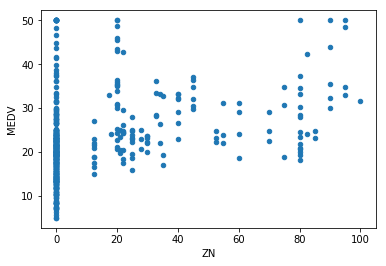

In [41]:
ax = bostondata.plot(x='ZN',y='MEDV', kind='scatter')

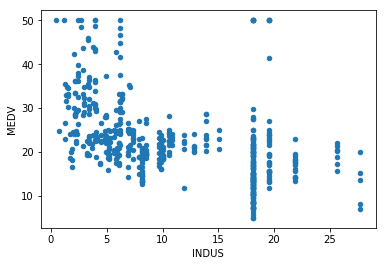

In [42]:
ax = bostondata.plot(x='INDUS',y='MEDV', kind='scatter')

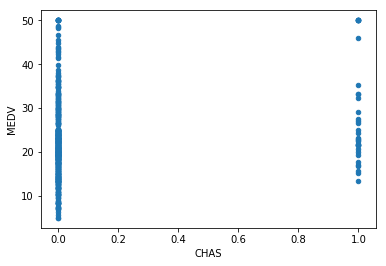

In [43]:
ax = bostondata.plot(x='CHAS',y='MEDV', kind='scatter')

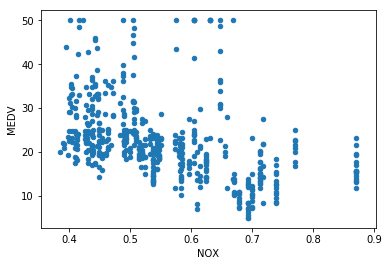

In [44]:
ax = bostondata.plot(x='NOX',y='MEDV', kind='scatter')

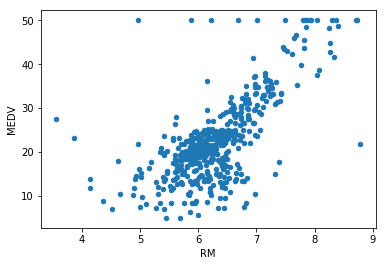

In [45]:
ax = bostondata.plot(x='RM',y='MEDV', kind='scatter')

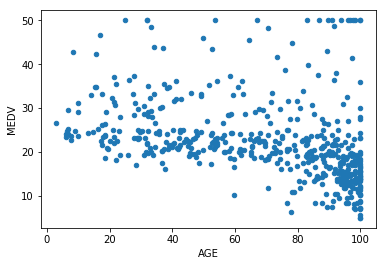

In [46]:
ax = bostondata.plot(x='AGE',y='MEDV', kind='scatter')

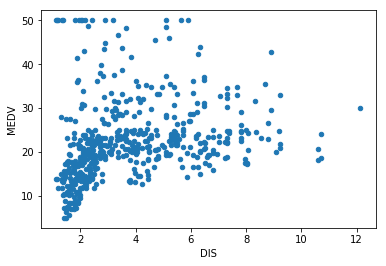

In [47]:
ax = bostondata.plot(x='DIS',y='MEDV', kind='scatter')

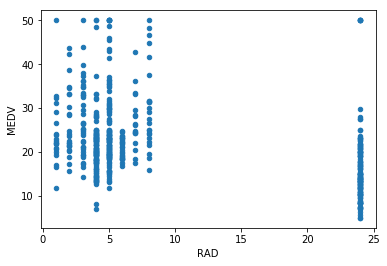

In [48]:
ax = bostondata.plot(x='RAD',y='MEDV', kind='scatter')

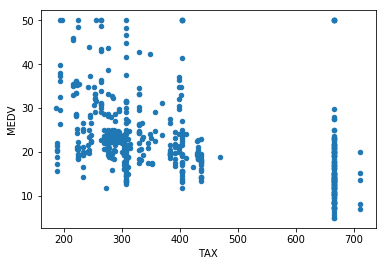

In [49]:
ax = bostondata.plot(x='TAX',y='MEDV', kind='scatter')

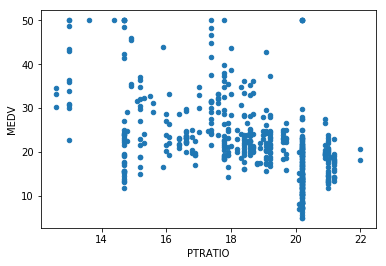

In [50]:
ax = bostondata.plot(x='PTRATIO',y='MEDV', kind='scatter')

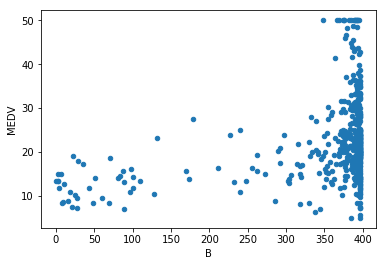

In [51]:
ax = bostondata.plot(x='B',y='MEDV', kind='scatter')

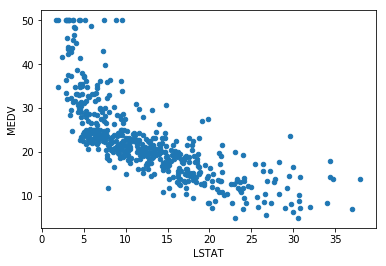

In [52]:
ax = bostondata.plot(x='LSTAT',y='MEDV', kind='scatter')

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [138]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lreg = LinearRegression()

In [139]:
#feature_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)
    
lreg.fit(X_train,y_train)

y_pred_train = lreg.predict(X_train)
y_pred_test = lreg.predict(X_test)

print(metrics.mean_squared_error(y_train,y_pred_train))
print(metrics.mean_squared_error(y_test,y_pred_test))

23.517585145992793
19.8296092486053


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [140]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits = 10, shuffle=True)

In [141]:
list(kf.split(X,y))

[(array([  0,   1,   2,   3,   5,   6,   8,   9,  11,  12,  13,  14,  15,
          16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,
          30,  32,  33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
          45,  46,  47,  48,  49,  51,  52,  53,  54,  55,  56,  57,  58,
          59,  60,  61,  62,  64,  65,  66,  68,  69,  70,  71,  72,  73,
          74,  75,  76,  78,  79,  80,  81,  82,  83,  84,  86,  87,  88,
          89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
         102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170,
         171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184,
         185, 186, 187, 188, 189, 190,

In [142]:
mse_test_values = []
mse_train_values = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_test_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    mse_train_values.append(metrics.mean_squared_error(y.iloc[train_index], lr.predict(X.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE Train: {}'.format(mse_train_values[n-1]))
    print('MSE Test: {}'.format(mse_test_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Train MSE for all folds: {}'.format(np.mean(mse_train_values)))
print('Mean of Test MSE for all folds: {}'.format(np.mean(mse_test_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE Train: 20.764940868629836
MSE Test: 33.539313954788945
Model 2
MSE Train: 21.109938155169637
MSE Test: 30.30682491754952
Model 3
MSE Train: 22.20243973518166
MSE Test: 19.754280384239404
Model 4
MSE Train: 21.677883770759884
MSE Test: 24.929833570029356
Model 5
MSE Train: 22.703777246162538
MSE Test: 15.18417245365176
Model 6
MSE Train: 21.280302693335543
MSE Test: 28.15046611976466
Model 7
MSE Train: 23.18671559069707
MSE Test: 10.398236306347012
Model 8
MSE Train: 22.243790798502392
MSE Test: 19.529118177095036
Model 9
MSE Train: 21.604478436475183
MSE Test: 25.991475284291468
Model 10
MSE Train: 21.205318515975257
MSE Test: 30.27321342319002
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Train MSE for all folds: 21.7979585810889
Mean of Test MSE for all folds: 23.80569345909472


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In [58]:
#For some reason this below code is giving me issues, using a workaround instead
#y_pred = np.zeros(y_test.shape) + y_train.mean()
#metrics.mean_squared_error(y_test, y_pred)

In [81]:
ytrainmean = y_train.mean()
ytrainmean

MEDV    22.339831
dtype: float64

In [60]:
y_test.shape

(152, 1)

In [61]:
ytrainnull = np.full((152,1),ytrainmean)
ytrainnull

array([[22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22.33983051],
       [22

In [82]:
metrics.mean_squared_error(y_test, ytrainnull)

92.06717299928938

## Simply predicting the average value tripled the MSE, our linear regression and Kfold models clearly have value.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

## An interesting result:   For the standalone linear regression, the test MSE was better than the train, with 23 train and 19 test.  The KFold results average were similar, with 22 train and 24 test.   Given the fact the train MSE of the linear regression was higher than the test set, this makes me think the model is not overfitting the data. This is supported by the fact that the KFold average results were about tied, with the training set performing about as well as the test sets (based on MSE).



- How much of a bias problem does your model appear to have? Why do you say that?

In [63]:
y.mean()

MEDV    22.532806
dtype: float64

In [64]:
y.std()

MEDV    9.197104
dtype: float64

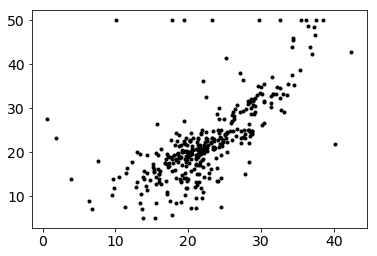

In [83]:
ax = plt.errorbar(y_pred_train, y_train, fmt='.k');

## Looking at the training performance, the clustering is mostly centered along the diagonal axis, but there are some big misses (outliers) throughout the plot.  Besides the outliers, model is performing well, so bias doesn't seem too severe.

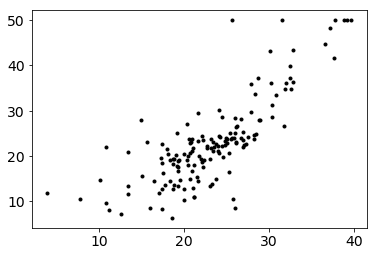

In [84]:
ax = plt.errorbar(y_pred_test, y_test, fmt='.k');

## The test data performs similarly, just with fewer points. See fewer outliers, with clustering around the diagonal axis.  Seeing similar performance on the test data, so again, bias doesn't seem severe.

- How much of a variance problem does your model appear to have? Why do you say that?

## Looking at the KFold performance, the MSE Test values ranged from 10 to 33, a pretty tight band.  Variance doesn't seem to be too volatile here.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [115]:
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [143]:
#Lets try removing NOX, DIS, and RAD, as they seem only slightly useful
feature_cols = ['CRIM','ZN','INDUS','CHAS','RM','AGE','TAX','PTRATIO','B','LSTAT']
feature_cols

['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [144]:
X = bostondata.loc[:,feature_cols]
y = bostondata.loc[:,'MEDV']

In [145]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits = 10, shuffle=True)
list(kf.split(X,y))

mse_test_values = []
mse_train_values = []
n = 0


In [146]:
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_test_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    mse_train_values.append(metrics.mean_squared_error(y.iloc[train_index], lr.predict(X.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE Train: {}'.format(mse_train_values[n-1]))
    print('MSE Test: {}'.format(mse_test_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Train MSE for all folds: {}'.format(np.mean(mse_train_values)))
print('Mean of Test MSE for all folds: {}'.format(np.mean(mse_test_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE Train: 26.11668740822378
MSE Test: 20.459331712520754
Model 2
MSE Train: 23.480163574808028
MSE Test: 44.66361088335125
Model 3
MSE Train: 26.62050314251746
MSE Test: 16.581495318342732
Model 4
MSE Train: 26.382458640175773
MSE Test: 18.636293815481515
Model 5
MSE Train: 26.316674193315365
MSE Test: 18.93233992989295
Model 6
MSE Train: 26.2509633109818
MSE Test: 19.816400610226623
Model 7
MSE Train: 25.517725507310583
MSE Test: 26.076826035826006
Model 8
MSE Train: 22.0755149433456
MSE Test: 61.01892069542806
Model 9
MSE Train: 25.653038409224052
MSE Test: 25.312996604689094
Model 10
MSE Train: 25.48976033178451
MSE Test: 26.031190390942225
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Train MSE for all folds: 25.390348946168693
Mean of Test MSE for all folds: 27.75294059967012


## Removing those three variablesworsed performance,increasing the avg MSEs to 25 and 28.  The averages increased 5 points, so not in the direction I hoped!

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [152]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [153]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [158]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
#Is this supposed to be generating content?

In [154]:
# Create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
#Is this code supposed to be generating content?

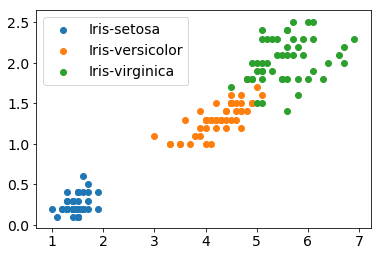

In [159]:
#I'll run my own color plot here
fig, ax = plt.subplots()
for species in iris.loc[:, 'species'].unique():
    ax.scatter(data=iris.loc[iris.loc[:, 'species'] == species, :], x='petal_length', y='petal_width', label=species)
    ax.legend();

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [175]:
iris.loc[:,'species_num'] = iris.loc[:,'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [162]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape DONE
- Data types DONE
- Count of null values by column DONE 
- Basic summary statistics DONE
- Number of unique values for each column DONE
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species DONE

In [164]:
iris.shape

(150, 6)

In [167]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num     float64
dtype: object

In [168]:
iris.isnull().sum()

sepal_length     0
sepal_width      0
petal_length     0
petal_width      0
species          0
species_num     50
dtype: int64

Not seeing any null values, looking good

In [169]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,100.000000
mean,5.843333,3.054000,3.758667,1.198667,0.500000
std,0.828066,0.433594,1.764420,0.763161,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.500000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [170]:
iris.loc[:,'sepal_length'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

In [171]:
iris.loc[:,'sepal_width'].value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal_width, dtype: int64

In [172]:
iris.loc[:,'petal_length'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal_length, dtype: int64

In [173]:
iris.loc[:,'petal_width'].value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

In [177]:
iris.loc[:,'species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [176]:
iris.loc[:,'species_num'].value_counts()

2    50
1    50
0    50
Name: species_num, dtype: int64

Value counts between species and species_num check out

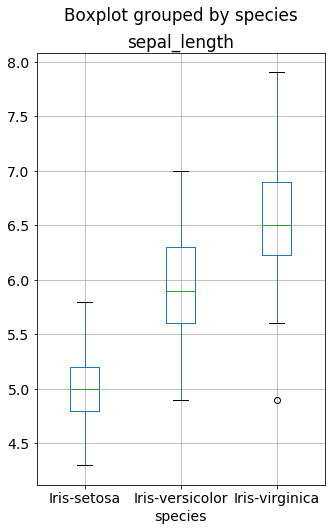

In [179]:
iris.boxplot(column='sepal_length', by='species',figsize=(5,8));

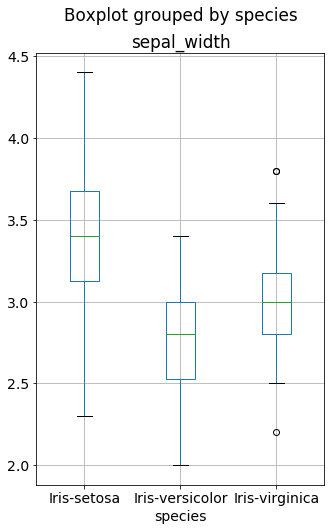

In [180]:
iris.boxplot(column='sepal_width', by='species',figsize=(5,8));

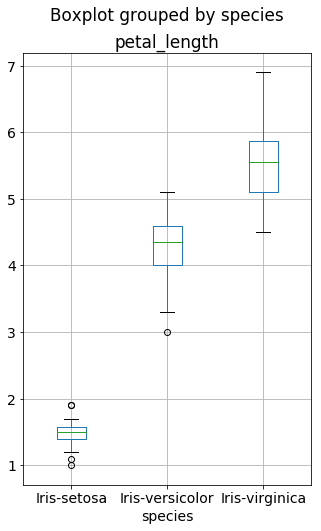

In [178]:
iris.boxplot(column='petal_length', by='species',figsize=(5,8));

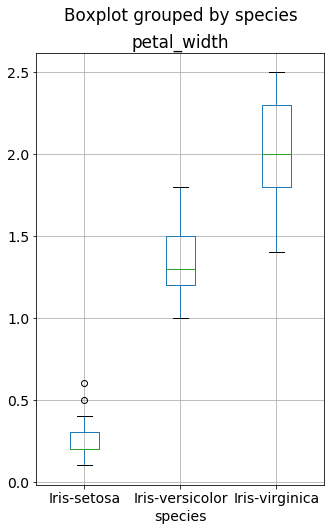

In [181]:
iris.boxplot(column='petal_width', by='species',figsize=(5,8));

- Get the accuracy of a null model that simply predicts the most common species.

In [187]:
yiris = iris.loc[:,'species_num']
yiris.tail()

145    2
146    2
147    2
148    2
149    2
Name: species_num, dtype: int64

In [189]:
frequencies = yiris.value_counts().sort_values(ascending=False)
total = frequencies.sum()
biggest_frequency = frequencies.iloc[0]
biggest_frequency / total

0.3333333333333333

## 33% makes sense, since dataset is broken into even thirds (1/3 species 1, 1/3 species 2, 1/3 species 3)

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [196]:
Xiris = iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
Xiris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [197]:
Xiris_train, Xiris_test, yiris_train, yiris_test = train_test_split(Xiris, yiris, random_state=99, shuffle=True)

In [198]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xiris_train, yiris_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [211]:
yiris_pred_class = knn.predict(Xiris_test)
yiris_pred_train = knn.predict(Xiris_train)
print((metrics.accuracy_score(yiris_test, yiris_pred_class)))
print((metrics.accuracy_score(yiris_train, yiris_pred_train)))
print(metrics.mean_squared_error(yiris_test,yiris_pred_class))
print(metrics.mean_squared_error(yiris_train,yiris_pred_train))

0.9210526315789473
0.9732142857142857
0.07894736842105263
0.026785714285714284


In [204]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits = 10, shuffle=True)
list(kf.split(Xiris,yiris))

iris_mse_test_values = []
iris_mse_train_values = []
n = 0



In [220]:

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(Xiris, yiris):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(Xiris.iloc[train_index,:], yiris.iloc[train_index])
        
    iris_mse_test_values.append(metrics.mean_squared_error(yiris.iloc[test_index], knn.predict(Xiris.iloc[test_index, :])))
    iris_mse_train_values.append(metrics.mean_squared_error(yiris.iloc[train_index], knn.predict(Xiris.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE Train: {}'.format(iris_mse_train_values[n-1]))
    print('MSE Test: {}'.format(iris_mse_test_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Train MSE for all folds: {}'.format(np.mean(iris_mse_train_values)))
print('Min of Train MSE for all folds: {}'.format(np.min(iris_mse_train_values)))
print('Max of Train MSE for all folds: {}'.format(np.max(iris_mse_train_values)))
print('Mean of Test MSE for all folds: {}'.format(np.mean(iris_mse_test_values)))
print('Min of Test MSE for all folds: {}'.format(np.min(iris_mse_test_values)))
print('Max of Test MSE for all folds: {}'.format(np.max(iris_mse_test_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE Train: 0.037037037037037035
MSE Test: 0.06666666666666667
Model 2
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 3
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 4
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 5
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 6
MSE Train: 0.02962962962962963
MSE Test: 0.06666666666666667
Model 7
MSE Train: 0.037037037037037035
MSE Test: 0.0
Model 8
MSE Train: 0.037037037037037035
MSE Test: 0.0
Model 9
MSE Train: 0.02962962962962963
MSE Test: 0.06666666666666667
Model 10
MSE Train: 0.02962962962962963
MSE Test: 0.13333333333333333
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Train MSE for all folds: 0.03777777777777778
Min of Train MSE for all folds: 0.02962962962962963
Max of Train MSE for all folds: 0.044444444444444446
Mean of Test MSE for all folds: 0.03333333333333334
Min of Test MSE for all folds: 0.0
Max of Test MSE for all folds: 0.13333333333333333


## KNN model came up with .08 MSE on training and .03 test, while KFold had averages of .05 on train and .1 on test.  Surprised to see the large increase in MSE for KFold, perhaps model can be improved by adjusting the number of nearest neighbors (currently set to 3)

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

## Scored 97% correct on training data, versus null's model of 33%. Scored 92% on the test data, again, pretty accurate model. Given the high accuracy score on the test data, model does not seem too impacted by bias. The Kfold results were all pretty consistent, so variance also seems to be low.


- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

## Accuracy declined from 97% to 92%, which makes sense, the model should perform better on training than test. This shows that the model is slightly overfitting to the specific training set. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

## The KFold MSE scores all held within pretty tight bands, which makes me think bias is more of an issue (decrease of 5% in accuracy) than variance.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [215]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits = 10, shuffle=True)
list(kf.split(Xiris,yiris))

iris_mse_test_values = []
iris_mse_train_values = []
n = 0



In [216]:

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(Xiris, yiris):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(Xiris.iloc[train_index,:], yiris.iloc[train_index])
        
    iris_mse_test_values.append(metrics.mean_squared_error(yiris.iloc[test_index], knn.predict(Xiris.iloc[test_index, :])))
    iris_mse_train_values.append(metrics.mean_squared_error(yiris.iloc[train_index], knn.predict(Xiris.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE Train: {}'.format(iris_mse_train_values[n-1]))
    print('MSE Test: {}'.format(iris_mse_test_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Train MSE for all folds: {}'.format(np.mean(iris_mse_train_values)))
print('Min of Train MSE for all folds: {}'.format(np.min(iris_mse_train_values)))
print('Max of Train MSE for all folds: {}'.format(np.max(iris_mse_train_values)))
print('Mean of Test MSE for all folds: {}'.format(np.mean(iris_mse_test_values)))
print('Min of Test MSE for all folds: {}'.format(np.min(iris_mse_test_values)))
print('Max of Test MSE for all folds: {}'.format(np.max(iris_mse_test_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE Train: 0.04356353689713086
MSE Test: 0.07335801929219771
Model 2
MSE Train: 0.047167276207246624
MSE Test: 0.04092436550115584
Model 3
MSE Train: 0.04645699458373789
MSE Test: 0.04731690011273451
Model 4
MSE Train: 0.04700279375999537
MSE Test: 0.04240470752641712
Model 5
MSE Train: 0.04581039773656074
MSE Test: 0.05313627173732884
Model 6
MSE Train: 0.04954875300015687
MSE Test: 0.019491074364963643
Model 7
MSE Train: 0.04597357694589723
MSE Test: 0.05166765885330036
Model 8
MSE Train: 0.04766627152083441
MSE Test: 0.0364334076788658
Model 9
MSE Train: 0.04358317617120511
MSE Test: 0.07318126582552946
Model 10
MSE Train: 0.04865707454361037
MSE Test: 0.02751618047388216
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Train MSE for all folds: 0.04654298513663755
Min of Train MSE for all folds: 0.04356353689713086
Max of Train MSE for all folds: 0.04954875300015687
Mean of Test MSE for all folds: 0.046542985136637544
Min of Test MSE for all

## After switching from K=3 to K=1, the range of MSE for the test dataimproved  to a tighter band (.02 to .07, from .02 to 1.0).

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [ ]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits = 10, shuffle=True)
list(kf.split(Xiris,yiris))





In [227]:
accuracy_values = []

for k in range (1,100):

    iris_accuracy_test_values = []
    iris_accuracy_train_values = []
    n = 0

    for train_index, test_index in kf.split(Xiris, yiris):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xiris.iloc[train_index,:], yiris.iloc[train_index])

        iris_accuracy_test_values.append(metrics.accuracy_score(yiris.iloc[test_index], knn.predict(Xiris.iloc[test_index, :])))
        iris_accuracy_train_values.append(metrics.accuracy_score(yiris.iloc[train_index], knn.predict(Xiris.iloc[train_index, :])))

        n += 1

    kfoldmean = np.mean(iris_accuracy_test_values)
    accuracy_values.append([k,kfoldmean])

In [236]:
accuracy_values

[[1, 0.9600000000000002],
 [2, 0.9333333333333333],
 [3, 0.96],
 [4, 0.9533333333333334],
 [5, 0.96],
 [6, 0.9666666666666668],
 [7, 0.9666666666666668],
 [8, 0.9533333333333334],
 [9, 0.9733333333333334],
 [10, 0.9666666666666668],
 [11, 0.9666666666666666],
 [12, 0.9733333333333334],
 [13, 0.96],
 [14, 0.9866666666666667],
 [15, 0.9733333333333334],
 [16, 0.9666666666666668],
 [17, 0.9800000000000001],
 [18, 0.9666666666666668],
 [19, 0.9600000000000002],
 [20, 0.9666666666666668],
 [21, 0.9733333333333334],
 [22, 0.9533333333333334],
 [23, 0.9800000000000001],
 [24, 0.96],
 [25, 0.9666666666666668],
 [26, 0.9533333333333334],
 [27, 0.9400000000000001],
 [28, 0.9466666666666667],
 [29, 0.9466666666666667],
 [30, 0.9466666666666667],
 [31, 0.96],
 [32, 0.9400000000000001],
 [33, 0.96],
 [34, 0.9466666666666667],
 [35, 0.9333333333333333],
 [36, 0.96],
 [37, 0.9199999999999999],
 [38, 0.9466666666666667],
 [39, 0.9533333333333334],
 [40, 0.9533333333333334],
 [41, 0.96],
 [42, 0.926666

In [238]:
scores_df = pd.DataFrame(accuracy_values, columns=['k', 'kfoldmean'])

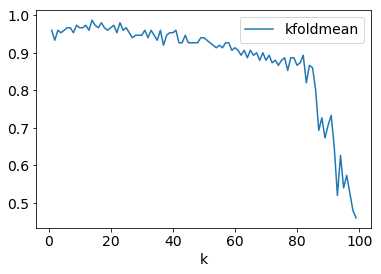

In [241]:
ax = scores_df.plot(kind='line', x='k', y='kfoldmean')

## clearly prediction value decreases as K increases. Takes a dive after K=80

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [70]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          1.59e-321
Time:                        15:27:14   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

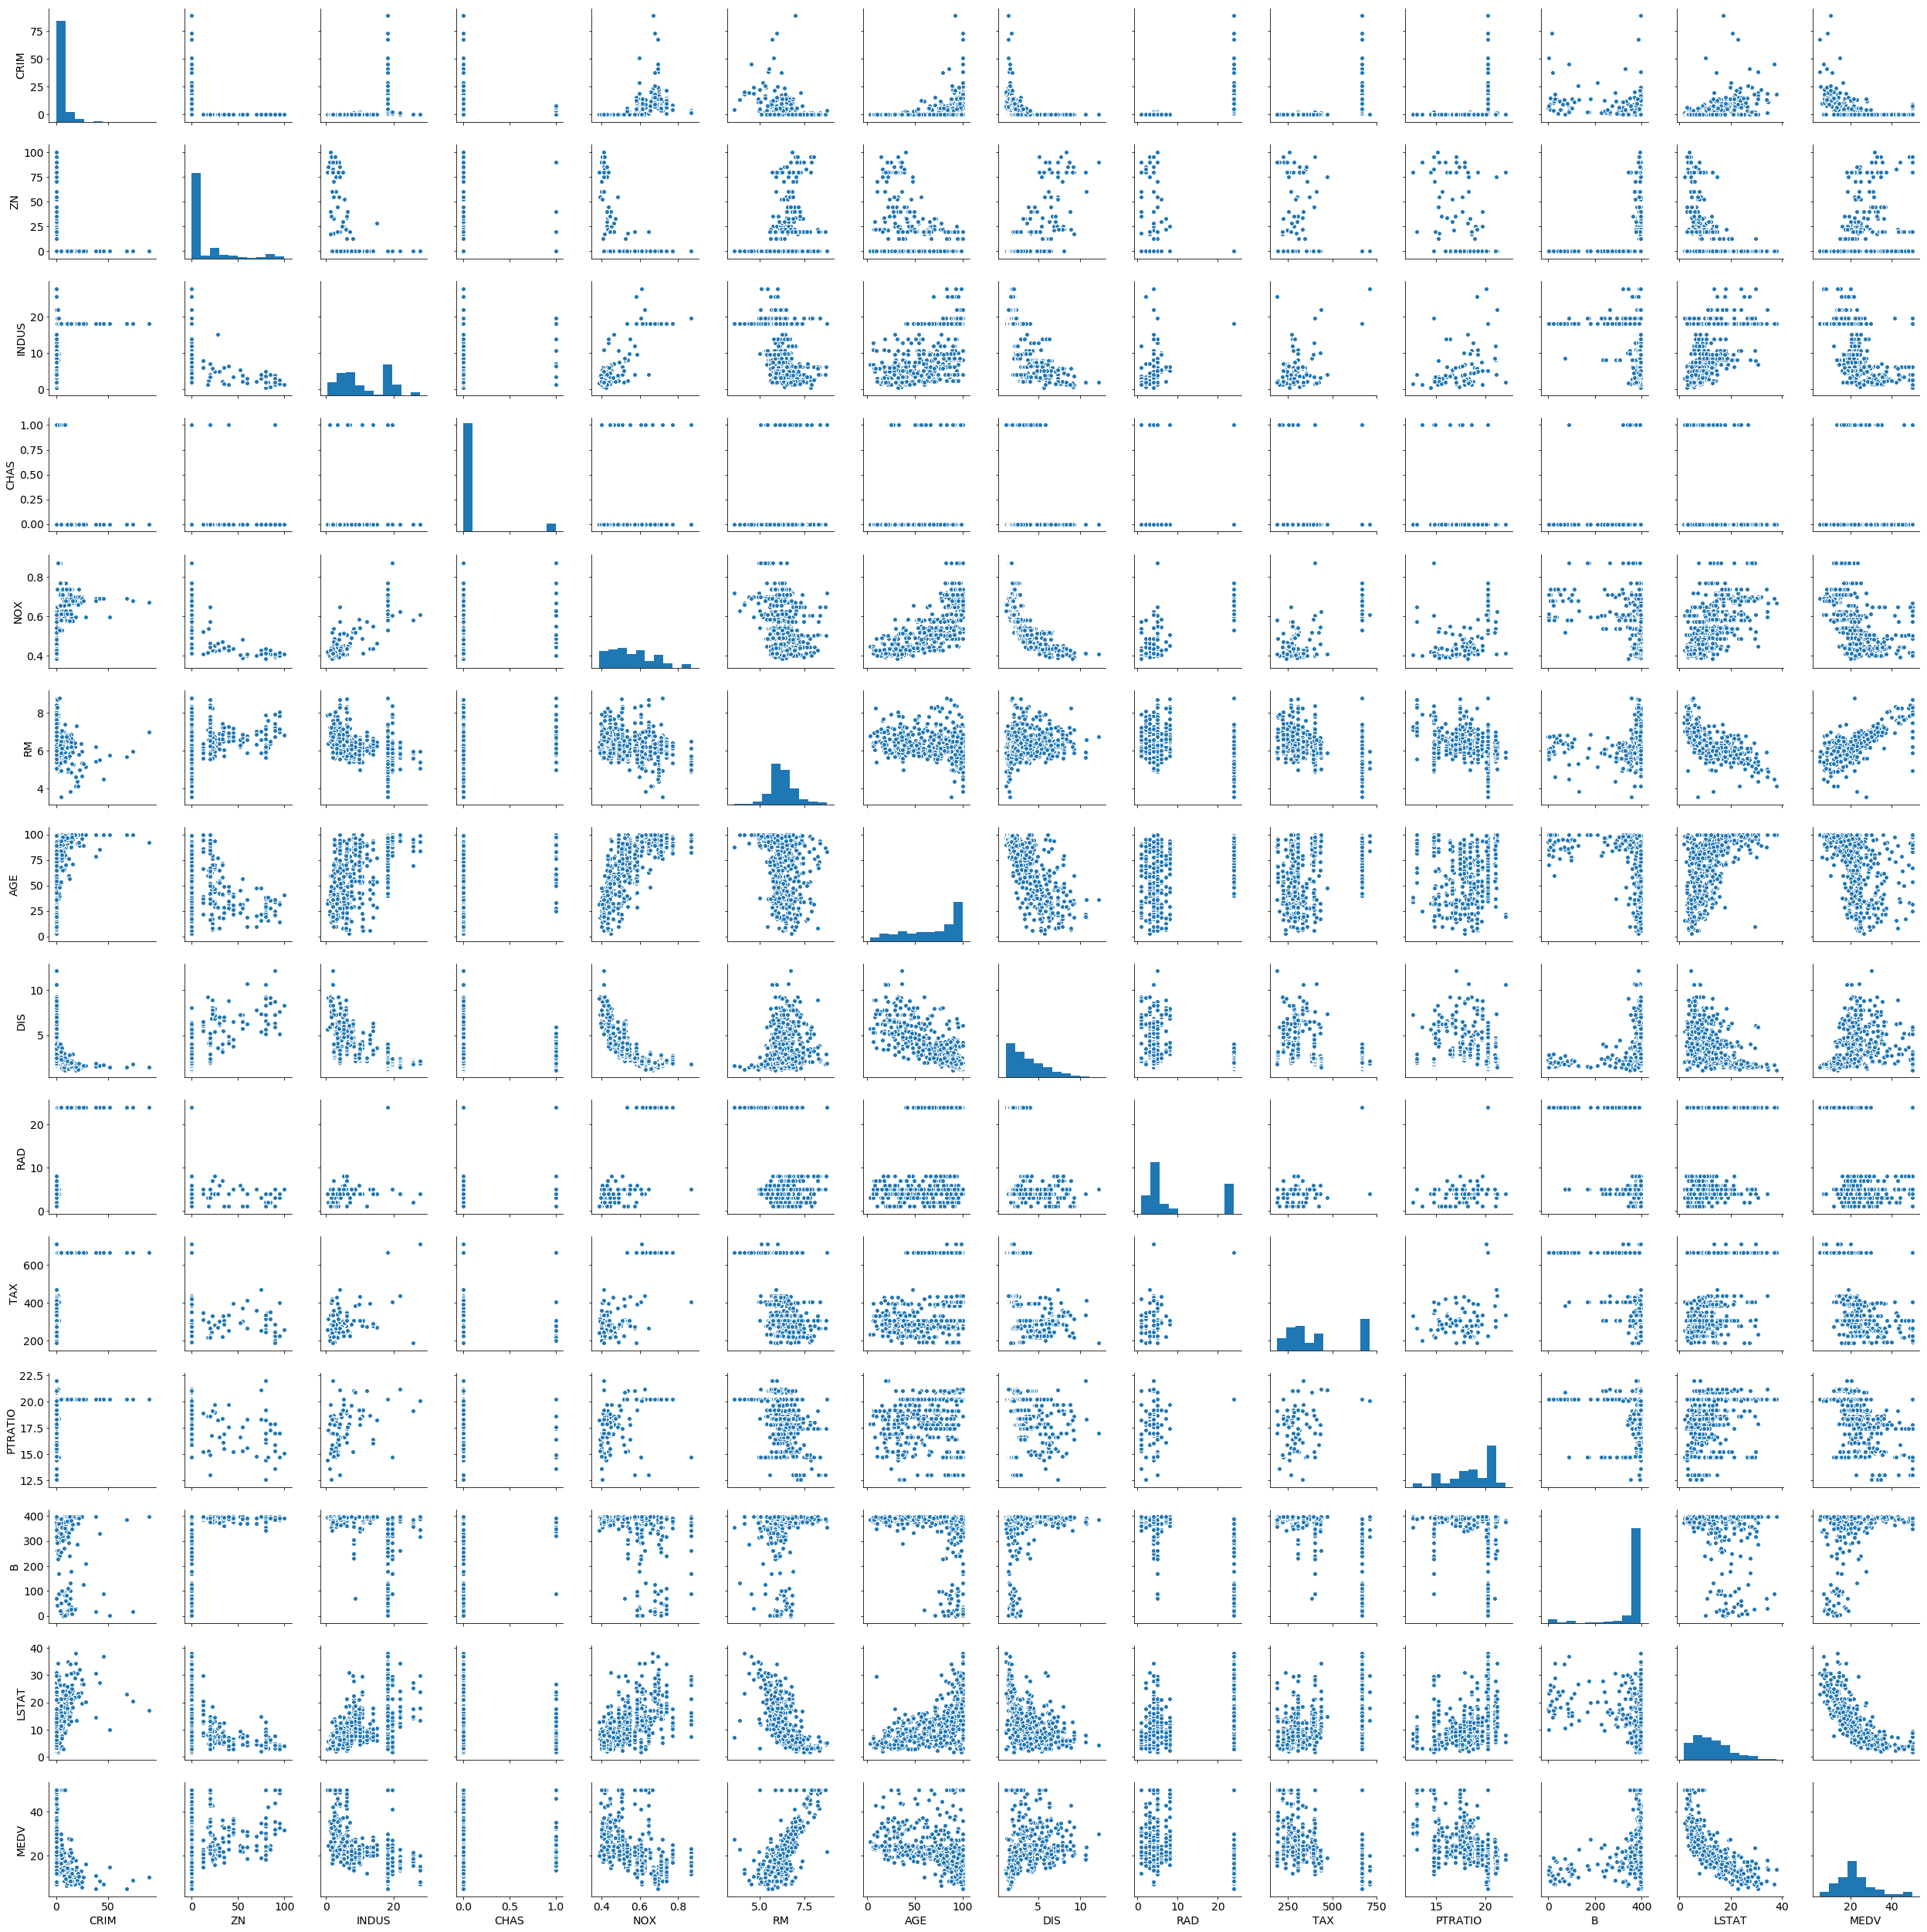

In [72]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [73]:
# Check out Pearson scores


### Demo: Patsy

In [74]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [75]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.4586088845259664
